**Capstone Project Submission**

* Student Name: Wes Swager
* Student Pace: Full Time
* Instructor Name: Claude Fried
* Scheduled Project Review Date/Time
    * Friday, June 11, 2021, 2:30pm CST
    * Monday, June 13, 2021, 2:30pm CST

# **Expected Goals Classifier**

# Overview

Create an expected goals classification model using existing historical match data for use with future match analysis and actionable recommendations which can be utilized in training to help improve goal-scoring.

Project detailed on Github: [milwaukee_fc](https://github.com/wswager/milwaukee_fc)

# Conclusions Notebook



*Notebook 6 of 8*

### Index

1. Data extracted in [expected_goals_data_extraction_notebook]()
2. Data organized in [expected_goals_data_organization_notebook]()
3. Features engineered in [expected_goals_feature_engineering_notebook]()
4. Data cleaned in [expected_goals_data_cleaning_notebook]()
5. Data explored in [expected_goals_data_exploration_notebook]()
6. Data preprocessed in [expected_goals_data_preprocessing_notebook]()
7. Model fitting and refinement in [expected_goals_model_fitting_notebook]()
8. Conclusions in [expected_goals_conclusions_notebook]()

### Data

Data sourced from [StatsBomb](https://statsbomb.com/), a United Kingdom based football (soccer) data analytics company.

StatsBomb have provided free access to their proprietary dataset via GitHub: [StatsBomb Open Data](https://github.com/statsbomb/open-data)

In [111]:
# Import cleaned_data from expected_goals_data_cleaning_notebook

cleaned_data = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_cleaning/cleaned_data.csv')

In [103]:
cleaned_data = cleaned_data.iloc[: , 1:]

In [104]:
# Import X_train, X_test, y_train, and y_test from expected_goals_data_cleaning_notebook and
# expected_goals_modeling_notebook

X_train_os = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/X_train_os.csv')
y_train_os = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/y_train_os.csv')

X_test = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/y_test.csv')

X = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/X.csv')
y = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/y.csv')

In [105]:
X_train_os = X_train_os.iloc[: , 1:]
y_train_os = y_train_os.iloc[: , 1:]

X_test = X_test.iloc[: , 1:]
y_test = y_test.iloc[: , 1:]

X = X.iloc[: , 1:]
y = y.iloc[: , 1:]

In [23]:
# Load models trained in expected_goals_modeling_notebook

lr = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/lr.pkl', 'rb'))
kn = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/kn.pkl', 'rb'))
dt = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/dt.pkl', 'rb'))
rf = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/rf.pkl', 'rb'))
gnb = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/gnb.pkl', 'rb'))
svc = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/svc.pkl', 'rb'))
gb = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/gb.pkl', 'rb'))
xgb = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/xgb.pkl', 'rb'))
bc = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/bc.pkl', 'rb'))
ada = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/ada.pkl', 'rb'))
vc = pickle.load(open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/vc.pkl', 'rb'))

<a id = 'packages'></a>
# Packages

In [30]:
# Drive  and IO to access saved data
from google.colab import drive, files
drive.mount('/content/drive')

import io

# Pandas for Dataframes
import pandas as pd

# Numpy and for mathematical functions
import numpy as np

# Scikit-learn for modeling

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, classification_report, confusion_matrix

# Matplotlib and Seaborn for visualizations

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

# Pickle to load models

import pickle

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Functions

In [62]:
# Generate model report

def model_report(train,
                 train_prediction):
  report = pd.DataFrame(classification_report(train,
                                              train_prediction,
                                              output_dict = True))
  display(report)

In [61]:
 # Calculate model ROC AUC

 # Visualize ROC Curve

def model_roc(train,
              train_probability):
  print('Area Under the Curve:',
        round(roc_auc_score(train,
                            train_probability[:,1]),2))
  
  fpr_train, tpr_train, thresholds_train = roc_curve(train, 
                                                     train_probability[:,1])
    
  f, ax = plt.subplots(figsize = (10, 10))
  
  plt.plot(fpr_train,
           tpr_train,
           'aqua',
           label = 'Train')
  
  plt.plot([0, 1],
           [0, 1],
           'purple')
  
  ax.set_title('Receiver Operating Characteristic')
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.legend(bbox_to_anchor = (1.05, 1),
            loc = 2,
            borderaxespad = 0);

In [128]:
# Visualize distribution of continuous variable feature shots and goals

def int_feature_v_goal(feature,
                       xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.legend(labels = ['Goal',
                        'Miss'],
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0);

In [129]:
# Visualize distribution of categorical variable feature shots and goals

def category_feature_v_goal(feature,
                            xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.legend(labels = ['Goal',
                        'Miss'],
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0);

In [130]:
# Visualize distribution of boolean variable feature shots and goals

def boolean_feature_v_goal(feature,
                            xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.legend(labels = ['Goal', 'Miss'],
             bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

# Best Performing Models

## K Neighbors

In [58]:
kn_predict = kn.predict(X)
kn_probability = kn.predict_proba(X)

In [63]:
print('Report')
model_report(y,
             kn_predict)

Report


,False,True,accuracy,macro avg,weighted avg
precision,0.956311,0.185897,0.6019,0.571104,0.872252
recall,0.579625,0.783784,0.6019,0.681704,0.601900
f1-score,0.721777,0.300518,0.6019,0.511148,0.675814
support,5438.000000,666.000000,0.6019,6104.000000,6104.000000


Area Under the Curve: 0.74


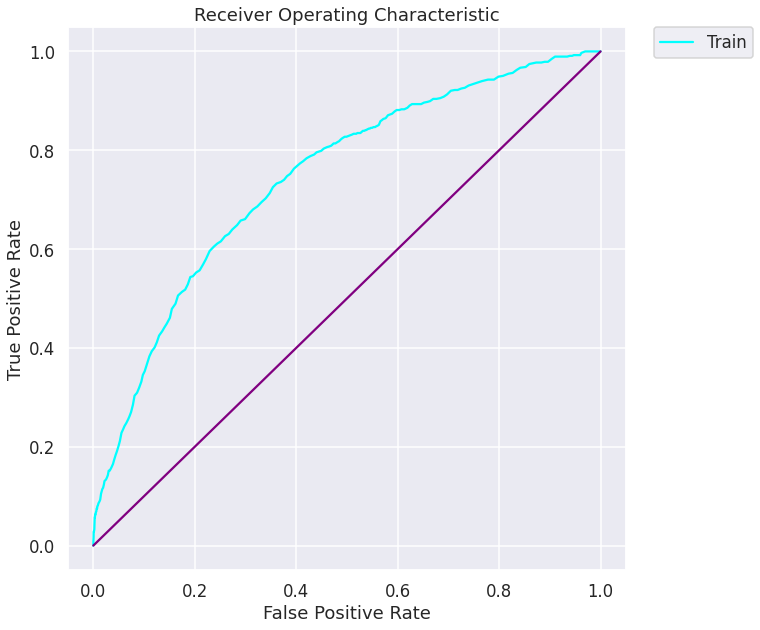

In [64]:
model_roc(y,
          kn_probability)

## Random Forest

In [65]:
rf_predict = rf.predict(X)
rf_probability = rf.predict_proba(X)

In [66]:
print('Report')
model_report(y,
             rf_predict)

Report


,False,True,accuracy,macro avg,weighted avg
precision,0.952654,0.182568,0.600917,0.567611,0.868631
recall,0.580912,0.764264,0.600917,0.672588,0.600917
f1-score,0.721727,0.294731,0.600917,0.508229,0.675138
support,5438.000000,666.000000,0.600917,6104.000000,6104.000000


Area Under the Curve: 0.75


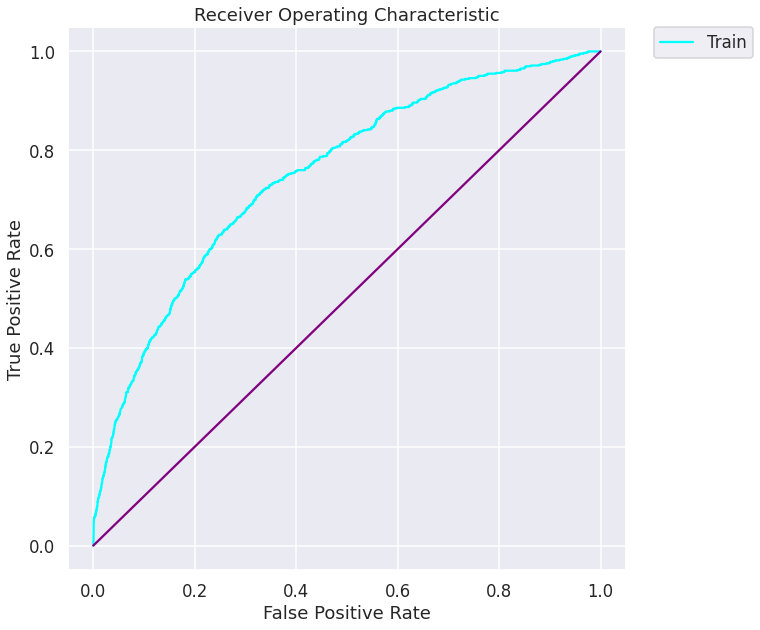

In [67]:
model_roc(y,
          rf_probability)

## Voting Classifier - K Neighbors + Random Forest

In [68]:
vc_predict = vc.predict(X)
vc_probability = vc.predict_proba(X)

In [69]:
print('Report')
model_report(y,
             vc_predict)

Report


,False,True,accuracy,macro avg,weighted avg
precision,0.952395,0.192219,0.629096,0.572307,0.869453
recall,0.614380,0.749249,0.629096,0.681815,0.629096
f1-score,0.746926,0.305947,0.629096,0.526437,0.698811
support,5438.000000,666.000000,0.629096,6104.000000,6104.000000


Area Under the Curve: 0.76


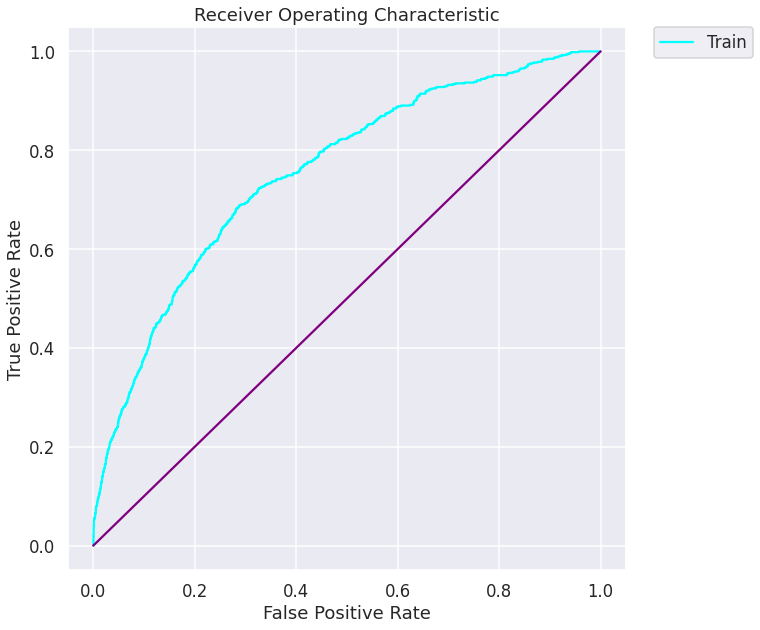

In [70]:
model_roc(y,
          vc_probability)

# Model Comparison

In [71]:
model_names = ['K Neighbors',
               'Random Forest',
               'Voting Classifier']

model_comparison = pd.DataFrame(model_names, columns = ['Model'])

probabilities = [kn_probability,
                 rf_probability,
                 vc_probability]

predictions = [kn_predict,
               rf_predict,
               vc_predict]

recall_scores = []
for p in predictions:
    recall_scores.append(round((recall_score(y, p)), 2))

model_comparison['Recall'] = recall_scores

roc_scores = []
for p in probabilities:
    roc_scores.append(round((roc_auc_score(y, p[:,1])), 2))

model_comparison['ROC'] = roc_scores

accuracy_scores = []
for p in predictions:
    accuracy_scores.append(round((accuracy_score(y, p)), 2))

model_comparison['Accuracy'] = accuracy_scores

model_comparison.sort_values('Recall',
                             ascending = False,
                             inplace = True)

model_comparison

,Model,Recall,ROC,Accuracy
0,K Neighbors,0.78,0.74,0.60
1,Random Forest,0.76,0.75,0.60
2,Voting Classifier,0.75,0.76,0.63


**Random Forest** will be the selected model

K Neighbors and Random Forest performed almost the same, therefore, for the sake of ease of use Random Forest has been selected.

# Applying xG to Broader Data

In [123]:
# Create DataFrame of intial Extracted, Organized, and Cleaned Data with xG

final_data = cleaned_data
final_data['xG'] = rf_probability[:,1]
final_data.drop('statsbomb_xg',
                axis = 1,
                inplace = True)

In [114]:
final_data['xG'].describe()

count    6104.000000
mean        0.105403
std         0.140447
min         0.000000
25%         0.023565
50%         0.049362
75%         0.120192
max         0.918415
Name: xG, dtype: float64

# Goals Baseline

In [133]:
print('Ratio of Goals:',
      round(((len(cleaned_data[cleaned_data['goal'] == True]) /
      len(cleaned_data)) * 100), 2), '%')

Ratio of Goals: 10.91 %


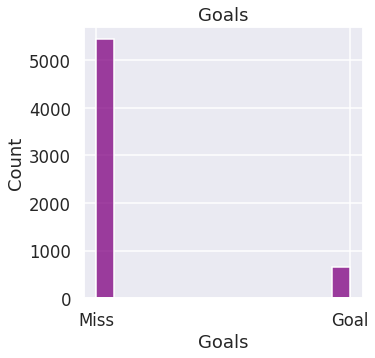

In [134]:
# Visualize ratio of goals

f, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data = cleaned_data,
             ax = ax,
             stat = 'count',
             multiple = 'stack',
             x = 'goal',
             kde = False,
             color = 'purple',
             element = 'bars',
             legend = False)
ax.set_title('Goals')
ax.set_xlabel('Goals')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Miss', 'Goal']);

# Feature Importance

In [72]:
# Visualize Feature Importance

def model_fi(model):
    model.fit(X, y)
    predictions = model.predict(X)
    
    fi = (pd.DataFrame(model.feature_importances_,
                       index = X.columns, 
          columns = ['importance']).sort_values('importance',
                                                ascending = False))
    fig, ax = plt.subplots(figsize = (10, 20))
    sns.barplot(x = 'importance', y = fi.index, 
                data = fi, color = 'purple')
    ax.set_title('Feature Importance')
    plt.show()

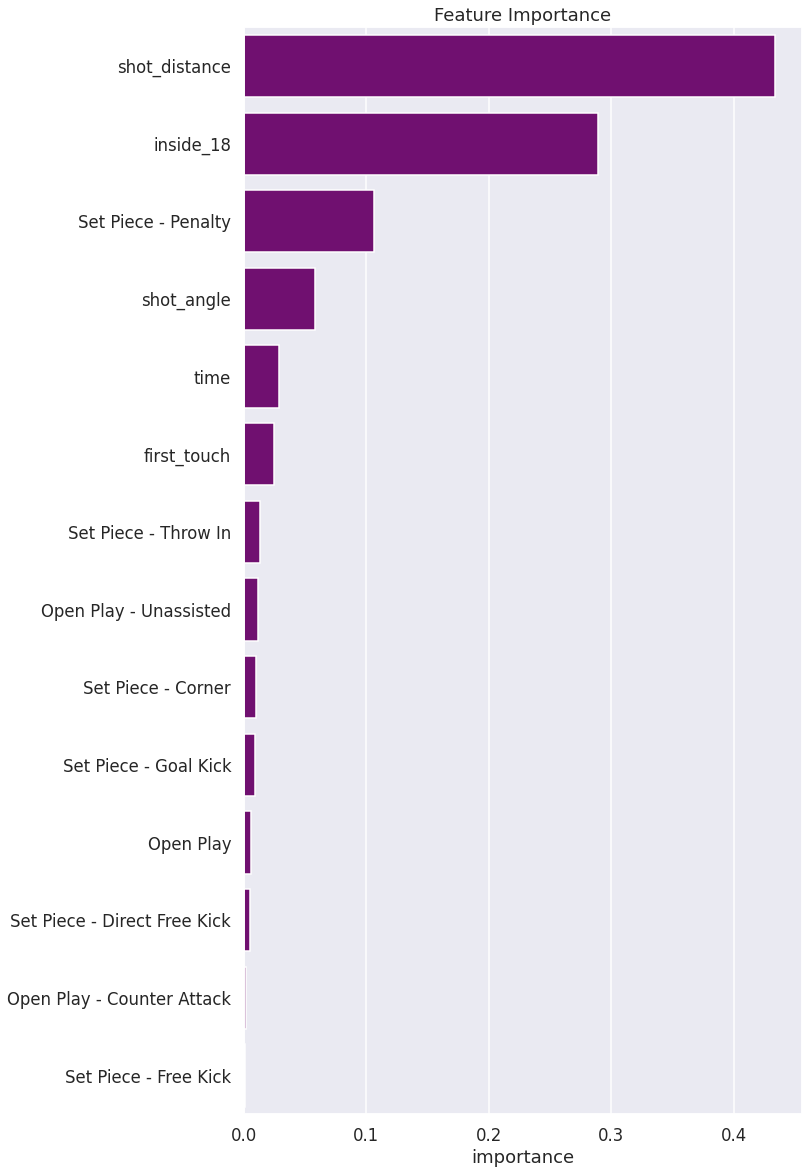

In [73]:
model_fi(rf)

## Shot Distance

As expected, shot_distance has the highest impact toward the likelihood of a goal.

In [126]:
cleaned_data['shot_distance'].describe()

count    6104.000000
mean       18.916359
std         9.071373
min         1.000000
25%        11.526057
50%        17.804494
75%        25.546526
max        66.540213
Name: shot_distance, dtype: float64

In [127]:
# Create a dataframe of shot distance intervals

shot_distance_intervals = ['<10', '10-20', '20-30', '30-40',
                           '40-50', '50-60', '>60']
distance_ratios = pd.DataFrame(shot_distance_intervals)

# Calculate ratio of shots and goals in 10-yard intervals from goal_center

shot_distance_ratios = []
goal_distance_ratios = []
goal_shot_distance_ratios = []
for i in range(0, 70, 10):
  shot_distance_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10))]) /
                                      len(cleaned_data)) *
                                     100), 2))

  goal_distance_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10)) &
                                                       (cleaned_data['goal'] == True)]) /
                                      len(cleaned_data[cleaned_data['goal'] == True])) *
                                     100), 2))
  
  goal_shot_distance_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10)) &
                                                       (cleaned_data['goal'] == True)]) /
                                      len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10))])) *
                                     100), 2))

distance_ratios['Ratio of Total Shots'] = shot_distance_ratios
distance_ratios['Ratio of Total Goals'] = goal_distance_ratios
distance_ratios['Ratio of Goals within Interval'] = goal_shot_distance_ratios

distance_ratios.rename(columns = {distance_ratios.columns[0] : 'Distance' },
                            inplace = True)

distance_ratios

,Distance,Ratio of Total Shots,Ratio of Total Goals,Ratio of Goals within Interval
0,<10,18.59,39.19,23.00
1,10-20,37.99,45.50,13.07
2,20-30,30.24,11.26,4.06
3,30-40,11.11,3.30,3.24
4,40-50,1.02,0.45,4.84
5,50-60,0.13,0.00,0.00
6,>60,0.07,0.15,25.00


In [131]:
print('Ratio of Shots Within 30-Yards:',
      (round((len(cleaned_data[(cleaned_data['shot_distance'] < 30)]) /
              (len(cleaned_data)) * 100), 2)), '%')
print('Ratio of Goals Within 20-Yards:',
      (round((len(cleaned_data[(cleaned_data['shot_distance'] < 20) &
                               cleaned_data['goal'] == True]) /
              (len(cleaned_data[cleaned_data['goal'] == True])) * 100), 2)), '%')

Ratio of Shots Within 30-Yards: 87.52 %
Ratio of Goals Within 20-Yards: 84.83 %


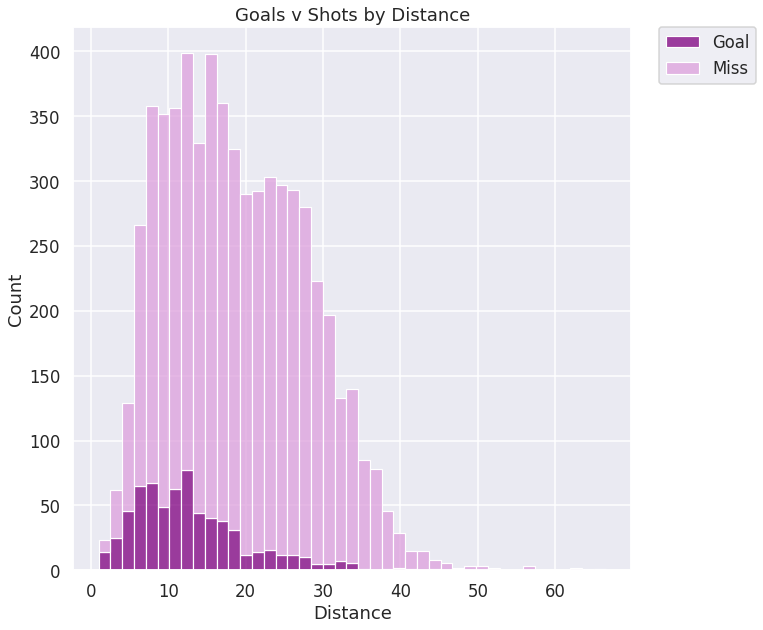

In [132]:
int_feature_v_goal('shot_distance',
                   'Distance')

The distribution of shots skews toward the 10-30-yard range, which is confirmed by the mean of approximately 19-yards.

However, the distribution of goals skews closer, the 0-20-yard range.

Similarly, the ratio shots within the 0-20-yard range resulting in a goal is also higher and higher than the average ratio of goals.

This could potentially indicate that players are often shooting too far from goal.

**Combined the the correlation of shots Inside the 18-Yard Box with goals and the impact Shot Distance has on the likelihood of a goal, this confirms that shots close to goal have a higher likelihood of scoring and therefore should be prioritized as a target in the team's player training, tactical planning.**

## Shot Angle

shot_angle also appears to have a higher correlations with the likelihood of goal.

In [135]:
cleaned_data['shot_angle'].describe()

count    6104.000000
mean       91.022638
std        33.911162
min         0.000000
25%        64.650000
50%        90.460000
75%       116.995000
max       180.000000
Name: shot_angle, dtype: float64

In [136]:
# Create a dataframe of shot angle intervals

shot_angle_intervals = ['<10', '10-20', '20-30', '30-40', '40-50',
                        '50-60', '60-70', '70-80', '>80']

shot_angle_ratios = pd.DataFrame(shot_angle_intervals)

shot_angle_ratios.rename(columns = {shot_angle_ratios.columns[0] : 'Angle from Center' },
                         inplace = True)

# Calculate ratio of total shots in 10-degree intervals from center

left_angle_shot_ratios = []
for i in range(90, 180, 10):
  left_angle_shot_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) /
                                   len(cleaned_data)) *
                                  100), 2))

shot_angle_ratios['Left - Ratio Total Shots'] = left_angle_shot_ratios

right_angle_ratios = []
for i in range(0, 90, 10):
  right_angle_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) /
                                   len(cleaned_data)) *
                                  100), 2))

shot_angle_ratios['Right - Ratio Total Shots'] = right_angle_ratios
shot_angle_ratios['Right - Ratio Total Shots'] = shot_angle_ratios['Right - Ratio Total Shots'].values[::-1]

# Calculate ratio of total goals in 10-degree intervals from center

left_angle_goal_ratios = []
for i in range(90, 180, 10):
  left_angle_goal_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[cleaned_data['goal'] == True])) *
                                  100), 2))

shot_angle_ratios['Left - Ratio Total Goals'] = left_angle_goal_ratios

right_angle_goal_ratios = []
for i in range(0, 90, 10):
  right_angle_goal_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[cleaned_data['goal'] == True])) *
                                  100), 2))

shot_angle_ratios['Right - Ratio Total Goals'] = right_angle_goal_ratios
shot_angle_ratios['Right - Ratio Total Goals'] = shot_angle_ratios['Right - Ratio Total Goals'].values[::-1]

# Calculate ratio of goals from shots within 10-degree intervals from center

left_angle_goal_shot_ratios = []
for i in range(90, 180, 10):
  left_angle_goal_shot_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) *
                                             100)), 2))

shot_angle_ratios['Left - Ratio Goals within Interval'] = left_angle_goal_shot_ratios

right_angle_goal_shot_ratios = []
for i in range(0, 90, 10):
  right_angle_goal_shot_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) *
                                              100)), 2))

shot_angle_ratios['Right - Ratio Goals within Interval'] = right_angle_goal_shot_ratios
shot_angle_ratios['Right - Ratio Goals within Interval'] = shot_angle_ratios['Right - Ratio Goals within Interval'].values[::-1]

shot_angle_ratios

,Angle from Center,Left - Ratio Total Shots,Right - Ratio Total Shots,Left - Ratio Total Goals,Right - Ratio Total Goals,Left - Ratio Goals within Interval,Right - Ratio Goals within Interval
0,<10,8.47,8.03,10.66,6.31,13.73,8.57
1,10-20,9.53,8.99,10.21,8.11,11.68,9.84
2,20-30,9.81,8.90,9.61,7.06,10.68,8.66
3,30-40,8.49,7.73,8.26,7.51,10.62,10.59
4,40-50,6.54,6.36,6.16,4.65,10.28,7.99
5,50-60,4.10,3.70,4.65,4.05,12.40,11.95
6,60-70,2.15,1.75,3.30,1.50,16.79,9.35
7,70-80,0.84,0.85,1.20,1.05,15.69,13.46
8,>80,0.20,0.31,0.30,0.30,16.67,10.53


In [137]:
# Create a dataframe for shot side

side_list = ['Right',
             'Left']

side_ratio = pd.DataFrame(side_list)

side_ratio.rename(columns = {side_ratio.columns[0] : 'Side' },
                            inplace = True)

# Calculate ratio of shots and goals side

side_shot_ratio = [(round((len(cleaned_data[cleaned_data['shot_angle'] < 90]) /
                           len(cleaned_data)) * 100, 2)),
                   (round((len(cleaned_data[cleaned_data['shot_angle'] > 90]) /
                           len(cleaned_data)) * 100, 2))]

side_goal_ratio = [(round((len(cleaned_data[(cleaned_data['shot_angle'] < 90) &
                                            cleaned_data['goal'] == True]) /
                           len(cleaned_data[cleaned_data['goal'] == True])) * 100, 2)),
                   (round((len(cleaned_data[(cleaned_data['shot_angle'] > 90) &
                                            cleaned_data['goal'] == True]) /
                           len(cleaned_data[cleaned_data['goal'] == True])) * 100, 2))]

side_shot_goal_ratio = [(round(((len(cleaned_data[(cleaned_data['shot_angle'] < 90) &
                                                 (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[(cleaned_data['shot_angle'] < 90)]))) * 100, 2)),
                        (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 90) &
                                                 (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[(cleaned_data['shot_angle'] > 90)]))) * 100, 2))]

side_ratio['Ratio Total Shots'] = side_shot_ratio
side_ratio['Ratio Total Goals'] = side_goal_ratio
side_ratio['Ratio Goals from Side'] = side_shot_goal_ratio

side_ratio

,Side,Ratio Total Shots,Ratio Total Goals,Ratio Goals from Side
0,Right,46.66,40.54,9.48
1,Left,50.15,54.35,11.83


In [138]:
print('Ratio of Total Shots within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135)]) /
                   len(cleaned_data)) *
               100), 2)), '%')

print('Ratio of Total Goals within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135) &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[cleaned_data['goal'] == True])) *
               100), 2)), '%')

print('Ratio of Goals from Shots within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135) &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135)])) *
               100), 2)), '%')

Ratio of Total Shots within 45-Degrees from Center: 79.23 %
Ratio of Total Goals within 45-Degrees from Center: 78.08 %
Ratio of Goals from Shots within 45-Degrees from Center: 10.75 %


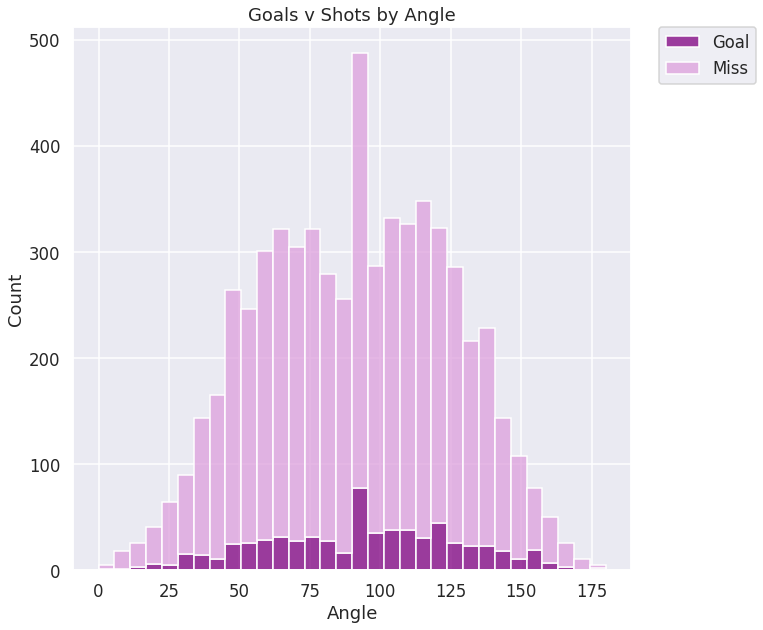

In [139]:
int_feature_v_goal('shot_angle',
                   'Angle')

The majority of shots are taken at an angle within 45-degrees of center, with the distribution of total goals not differing significantly from the shot distribution.

However, the ratio of goals from shots left of center is significantly higher (*and holds true at all intervals*)

**With the impact Shot Angle has on the likelihood of a goal, this confirms that shots from more central positions left of center have a higher likelihood of scoring and therefore should be prioritized as a target in the team's player training, tactical planning.**

Also, while the ratio of shots from tighter angles decreases the ratio of goals from shots at those angles increases significantly.  Extremely small angles from center would naturally be closer to goal, due to the goals location on the endline.

**Combined the the correlation of Shot Distance with goals and both features' impact on the likelihood of a goal, this supports the previous conclusion that shots close to goal have a higher likelihood of scoring and therefore should be prioritized as a target in the team's player training, tactical planning.**

## Set Piece - Penalty

Set Piece - Penalty likely has a high impace due to the extremely high ratio of penalty shots which result in a goal.

In [140]:
print('Ratio of Goals from Penalties:',
      (round(((len(cleaned_data[(cleaned_data['state_of_play'] == 'Set Piece - Penalty') &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[cleaned_data['state_of_play'] == 'Set Piece - Penalty'])) *
              100), 2)), '%')

Ratio of Goals from Penalties: 71.7 %


Because being awarded penalties is out of the players' and team's control, no specific conclusions can be drawn from the impact of this feature.

# Filtering Data

In [116]:
# Filter dataframe

player_team_df = final_data[['player','team','goal','xG']]

# Calculate the difference between xG and actual goals

player_team_df['xG_differance'] = player_team_df['goal'] - player_team_df['xG']

player_team_df['xG'] = player_team_df['xG'].round(2)
player_team_df['xG_differance'] = player_team_df['xG_differance'].round(2)

## Applying to Players

In [117]:
player_df = player_team_df.groupby(['player']).sum()

### Top-10 Player xG

In [118]:
player_df = player_df.sort_values(by = ['xG'],
                                  ascending=False)

player_df.head(10)

,goal,xG,xG_differance
player,,,
Vivianne Miedema,37,28.18,8.82
Bethany England,23,19.80,3.20
Nikita Parris,19,16.92,2.08
Fara Williams,16,13.24,2.76
Georgia Stanway,17,12.92,4.08
Danielle van de Donk,16,12.34,3.66
Ellen White,12,10.71,1.29
Francesca Kirby,7,9.35,-2.35
Lynn Williams,7,9.17,-2.17


### Top-10 Player Goals

In [119]:
player_df = player_df.sort_values(by = ['goal'],
                                  ascending=False)

player_df.head(10)

,goal,xG,xG_differance
player,,,
Vivianne Miedema,37,28.18,8.82
Bethany England,23,19.80,3.20
Nikita Parris,19,16.92,2.08
Georgia Stanway,17,12.92,4.08
Fara Williams,16,13.24,2.76
Danielle van de Donk,16,12.34,3.66
Kim Little,13,7.67,5.33
Jordan Nobbs,13,8.28,4.72
Ellen White,12,10.71,1.29


Using these types of filters can help determine if a player is over or under scoring v their xG.

If a player is over-scoring, then the following hypothesis may apply:
* The player is an excellent finisher, capable of creating goals from lesser opportunities due to their outstanding personal ability
* The player is likely to experience a period of under-scoring as their trend reverts to the mean

(*The reverse hypothesis would be applicable to players under-scoring*)

## Applying to Teams

In [124]:
team_df = player_team_df.groupby(['team']).sum()

### Top-10 Team xG

In [125]:
team_df = team_df.sort_values(by = ['xG'],
                                  ascending=False)

team_df.head(10)

,goal,xG,xG_differance
team,,,
Manchester City WFC,90,80.82,9.18
Chelsea FCW,86,79.04,6.96
Arsenal WFC,105,78.15,26.85
Reading WFC,55,50.30,4.70
West Ham United LFC,41,37.14,3.86
Everton LFC,31,35.47,-4.47
Brighton & Hove Albion WFC,27,35.39,-8.39
Birmingham City WFC,32,32.77,-0.77
North Carolina Courage,29,31.78,-2.78


Top-10 Team Goals

In [122]:
team_df = team_df.sort_values(by = ['goal'],
                                  ascending=False)

team_df.head(10)

,goal,xG,xG_differance
team,,,
Arsenal WFC,105,78.15,26.85
Manchester City WFC,90,80.82,9.18
Chelsea FCW,86,79.04,6.96
Reading WFC,55,50.30,4.70
West Ham United LFC,41,37.14,3.86
Birmingham City WFC,32,32.77,-0.77
Everton LFC,31,35.47,-4.47
North Carolina Courage,29,31.78,-2.78
Brighton & Hove Albion WFC,27,35.39,-8.39


Using these types of filters can help determine if a team is over or under scoring v their xG.

If a team is over-scoring, then the following hypothesis may apply:
* The team finishers are over-performing their creators resulting in a high number of goals but from a low quanity and/or quality of chances
* The team is likely to experience a period of under-scoring as their trend reverts to the mean

(*The reverse hypothesis would be applicable to teams under-scoring*)

# Next Steps

* **Create a visual mapping shot location on a field diagram with a color-gradient for xG in order to visually represent the specific locations, based on distance and angle, with the higest xG**
* **Engineer a feature creating a triangle of vectors from the shot location to each post, then calculating opposition coordinates within the specified area**
* **Apply xG to match timestamp data, with a visual of the accumulated xG throughout the match v the actual score and outcome of the match***
* **Extract for assist-specific features in order to develop an Expected Assist (xA) metric**